In [102]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [103]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')

import ipywidgets as widgets

In [104]:
import scipy.special

In [105]:
scipy.special.j0(np.linspace(0,10,num =10, endpoint = True))

array([ 1.        ,  0.71437185,  0.09804337, -0.35142283, -0.33295586,
        0.01203057,  0.28172071,  0.21983519, -0.06240414, -0.24593576])

In [106]:
def getXY(n: int):
    X = np.linspace(0,10,num = n, endpoint = True)
    Y = scipy.special.j0(X)
    return X, Y

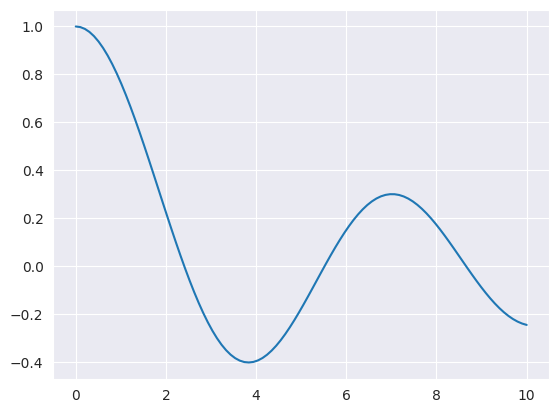

In [107]:
n = 100
plt.plot(getXY(n)[0],getXY(n)[1])

In [108]:
@widgets.interact(n=(4, 30))
def drawFunction(n: int = 4):
    plt.figure(figsize=(15, 7), dpi=70)
    x, y = getXY(n)
    plt.plot(x, y, 'or', label=f"$n={n}$")
    plt.legend(loc='best')
    plt.show()

interactive(children=(IntSlider(value=4, description='n', max=30, min=4), Output()), _dom_classes=('widget-int…

In [109]:
def LagrangePoly(X: np.ndarray, Y: np.ndarray):
    
    n = X.size
    X = X.copy()
    Y = Y.copy()
    l = lambda x, i: np.prod([(x - X[j]) for j in range(n) if j != i])
    
    P = lambda x: np.sum([Y[i] * (l(x, i)) / (l(X[i], i)) for i in range(n)])
    
    return P

In [110]:
import numpy as np

def chebyshev_points(n, a, b):
    """
    Возвращает точки по оси икс с помощью полиномов Чебышева.

    Параметры:
    n (int): Количество точек.
    a (float): Начало интервала.
    b (float): Конец интервала.

    Возвращает:
    np.ndarray: Точки по оси икс.
    """
    theta = np.pi * (2 * np.arange(1, n + 1) - 1) / (2 * n)
    x = (b - a) / 2 * np.cos(theta) + (b + a) / 2
    return x

In [111]:
n = 20
a = 0
b = 10
x = chebyshev_points(n, a, b)
print(x)

[9.98458667 9.8618496  9.61939766 9.26320082 8.80202983 8.24724024
 7.61249282 6.91341716 6.16722682 5.39229548 4.60770452 3.83277318
 3.08658284 2.38750718 1.75275976 1.19797017 0.73679918 0.38060234
 0.1381504  0.01541333]


In [112]:
def getXYC(n: int):
    X = np.linspace(0,10,num = n, endpoint = True)
    Y = scipy.special.j0(X)
    return X, Y

In [113]:
@widgets.interact(n=(4, 50))
def drawLagrangeInterpolation(n: int = 50):
    fg, ax = plt.subplots(1, 2, figsize=(16, 8), dpi=70)
    X, Y = getXYC(n)
    P = LagrangePoly(X, Y)
    x = np.linspace(0,10,num = n*2, endpoint = True)
    yy = np.vectorize(P)(x)
    
    OriginalY = scipy.special.j0(x)
    ax[0].plot(x, OriginalY, 'or')
    ax[0].plot(x, yy, linestyle=':', label=r"$Lagrange \ P_n(x)$")
    ax[0].plot(x, OriginalY, label=r"$J_0$")
    ax[1].plot(x, abs(yy - OriginalY))
    ax[1].set_title(r'$Lagrange \ P_n(x) - J_0$')
    ax[0].legend(loc='best')

interactive(children=(IntSlider(value=50, description='n', max=50, min=4), Output()), _dom_classes=('widget-in…

In [114]:
def getXY(n: int):
    X = chebyshev_points(n, 0, 10)
    Y = scipy.special.j0(X)
    return X, Y

In [115]:
@widgets.interact(n=(4, 50))
def drawLagrangeInterpolation(n: int = 50):
    fg, ax = plt.subplots(1, 2, figsize=(16, 8), dpi=70)
    X, Y = getXY(n)
    P = LagrangePoly(X, Y)
    x = np.linspace(0,10,num = n*2, endpoint = True)
    yy = np.vectorize(P)(x)
    
    OriginalY = scipy.special.j0(x)
    ax[0].plot(x, OriginalY, 'or')
    ax[0].plot(x, yy, linestyle=':', label=r"$Lagrange \ P_n(x)$")
    ax[0].plot(x, OriginalY, label=r"$J_0$")
    ax[1].plot(x, abs(yy - OriginalY))
    ax[1].set_title(r'$Lagrange \ P_n(x) - J_0$')
    ax[0].legend(loc='best')

interactive(children=(IntSlider(value=50, description='n', max=50, min=4), Output()), _dom_classes=('widget-in…